In [255]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
%matplotlib inline
# 한글출력 : 한글 출력 시 오류 나면 추가
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [256]:
import warnings
warnings.filterwarnings(action='ignore')

In [257]:
data = pd.read_csv('data/mushrooms.csv')

In [258]:
data.head()

,class,cap-shape,cap-surface,cap-color,...,ring-type,spore-print-color,population,habitat
0,p,x,s,n,...,p,k,s,u
1,e,x,s,y,...,p,n,n,g
2,e,b,s,w,...,p,n,n,m
3,p,x,y,w,...,p,k,s,u
4,e,x,s,g,...,e,n,a,g


In [259]:
data.shape

(8124, 23)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [261]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [262]:
# 결측 비율이 30%에 가까운 stalk-root 제거
del data['stalk-root']

In [263]:
data['class'].unique()
# e = 식용, p = 독버섯 ~ 이진분류

array(['p', 'e'], dtype=object)

In [264]:
# 문자열 데이터를 정수형 데이터로 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
    
data.head()

,class,cap-shape,cap-surface,cap-color,...,ring-type,spore-print-color,population,habitat
0,1,5,2,4,...,4,2,3,5
1,0,5,2,9,...,4,3,2,1
2,0,0,2,8,...,4,3,2,3
3,1,5,3,8,...,4,2,3,5
4,0,5,2,3,...,0,3,0,1


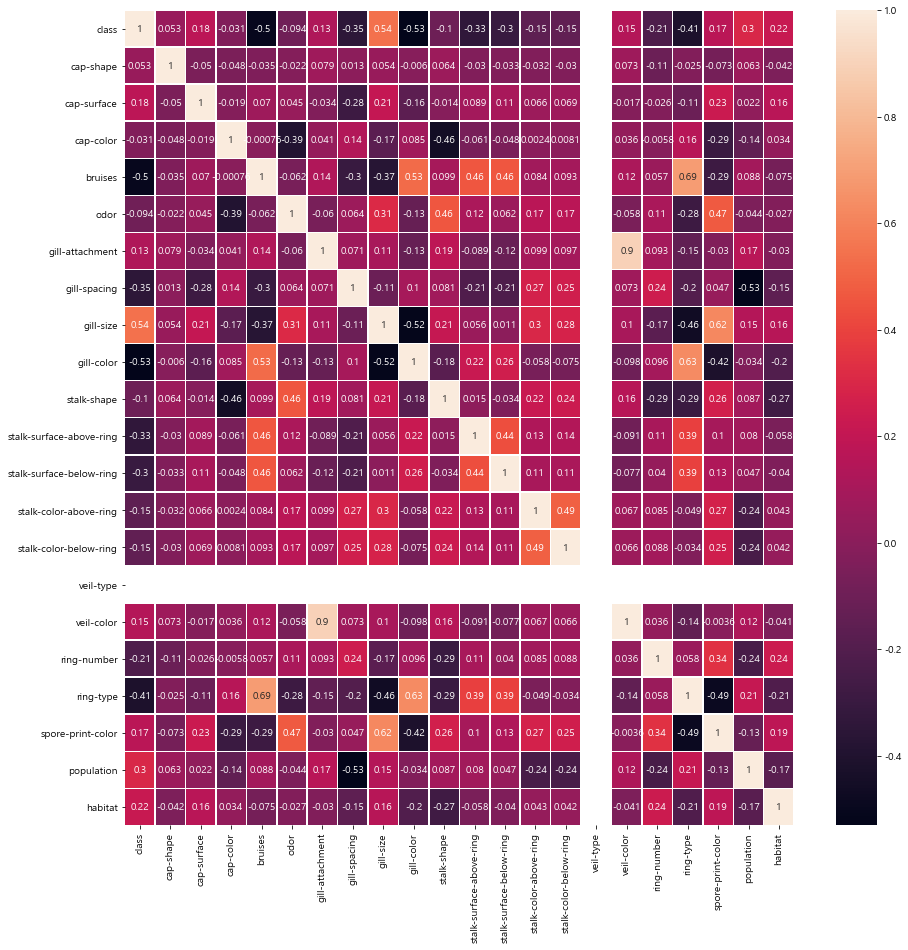

In [265]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidths=.5)
plt.show()

In [266]:
# 단일 카테고리인 veil-type 제거
del data['veil-type']

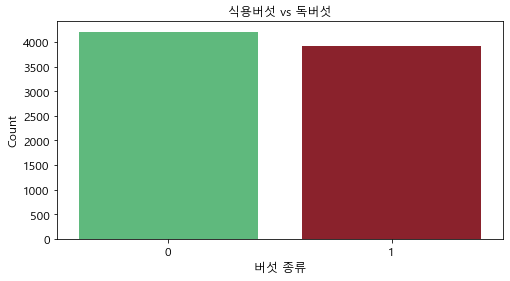

class
0    4208
1    3916
dtype: int64


In [267]:
plt.figure(figsize=(8,4))
plt.title('식용버섯 vs 독버섯', fontsize=12)
sns.countplot(x="class", data=data, palette=('#50c878','#9b111e'))
plt.xlabel("버섯 종류", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print(data.groupby('class').size())
# 0 = 식용, 1 = 독버섯

In [268]:
# 약 5:5의 비율로 균형잡힌 데이터임을 알 수 있음

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# target, feature 분리
X = data.drop(columns='class') # feature
y = data['class'] # target

# Scale 적용
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 70%를 훈련데이터로 사용
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [270]:
# import model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [271]:
# Model List
lr = LogisticRegression()
rf = RandomForestClassifier()
gbrt = GradientBoostingClassifier()

In [272]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def model(model):
    model.fit(X_train,y_train)
    print('train 점수 : {:.3f}'.format(model.score(X_train, y_train)))
    print('test 점수 : {:.3f}'.format(model.score(X_test, y_test)))
    print('\n')
    
def result(model):
    pred = model.predict(X_test)
    score = accuracy_score(y_test,pred)    
    print(classification_report(y_test,pred))
    print("accuracy_score:{:.3f}\n".format(score))
    #confusion = confusion_matrix(y_test,pred)
    #print(confusion)
    
def confusion(y_test,y_pred):
    confusion = confusion_matrix(y_test,y_pred)
    print("오차 행렬 : \n{}".format(confusion))

In [357]:
# LogisticRegression
print(lr)
model(lr)
result(lr)

LogisticRegression()
train 점수 : 0.948
test 점수 : 0.947


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1257
           1       0.95      0.94      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

accuracy_score:0.947



In [358]:
# RandomForest
print(rf)
model(rf)
result(rf)

RandomForestClassifier()
train 점수 : 1.000
test 점수 : 1.000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

accuracy_score:1.000



In [359]:
# GradientBoosting
print(gbrt)
model(gbrt)
result(gbrt)

GradientBoostingClassifier()
train 점수 : 1.000
test 점수 : 1.000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

accuracy_score:1.000



In [276]:
# 정확도가 1로 나오는 것은 과적합이 아닌 데이터 해당 데이터의 성질
# 모델들의 성능 비교가 어려워 새로운 방식으로 학습 추가 진행

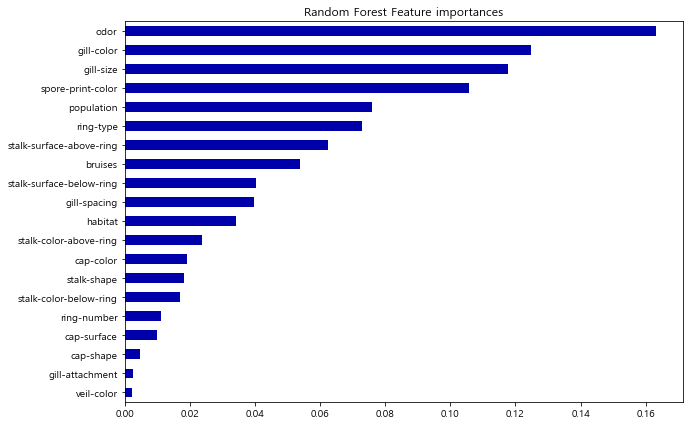

In [277]:
# Random Forest feature importances
# 컬럼명 리스트
columns=[]
for col in data.columns:
    if (col != 'class'):
        columns.append(col)

importances_rf = pd.Series(rf.feature_importances_, index = columns)

#Sorting importances
sorted_importances_rf = importances_rf.sort_values()

#Plotting sorted importances
fig, ax = plt.subplots(figsize = (10,7))
sorted_importances_rf.plot(kind = 'barh')
ax.set_title('Random Forest Feature importances')
plt.show()

In [278]:
# 상위 3개의 데이터만 selection
X_fi =data[['odor','gill-color','gill-size']]

In [279]:
# 데이터의 70%를 훈련 데이터로 사용
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X_fi,y,test_size = 0.3,random_state = 42)

In [362]:
# 상위 특성 중요도 RandomForest
print(rf)
rf.fit(X_train_fi,y_train_fi)
print('train 점수 : {:.3f}'.format(rf.score(X_train_fi, y_train_fi)))
print('test 점수 : {:.3f}'.format(rf.score(X_test_fi, y_test_fi)))
print('\n')
    

pred_fi= rf.predict(X_test_fi)
score = accuracy_score(y_test_fi,pred_fi)    
print(classification_report(y_test_fi,pred_fi))
print("accuracy_score:{:.3f}\n".format(score))

confusion(y_test_fi,pred_fi)

RandomForestClassifier()
train 점수 : 0.989
test 점수 : 0.988


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.97      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

accuracy_score:0.988

오차 행렬 : 
[[1257    0]
 [  30 1151]]


In [281]:
# GridSearch를 이용하여 최적의 매개변수 찾기
from sklearn.model_selection import GridSearchCV

param_rf={'n_estimators':[1,2,3,4,5,6,7,8,9,10],
          'max_depth':[1,2,3,4,5,6,7,8,9,10]}

grid_rf=GridSearchCV(rf,param_grid=param_rf,cv=5)
grid_rf.fit(X_train_fi,y_train_fi)

print(grid_rf.best_score_)
print(grid_rf.best_estimator_)

model_rf = grid_rf.best_estimator_

0.9890954984365171
RandomForestClassifier(max_depth=7, n_estimators=3)


In [363]:
# GridSearch를 적용한 결과, 이전과 동일
print(rf)
pred_fi= model_rf.predict(X_test_fi)
score = accuracy_score(y_test_fi,pred_fi)    
print(classification_report(y_test_fi,pred_fi))
print("accuracy_score:{:.3f}\n".format(score))

confusion(y_test_fi,pred_fi)

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.97      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

accuracy_score:0.988

오차 행렬 : 
[[1257    0]
 [  30 1151]]


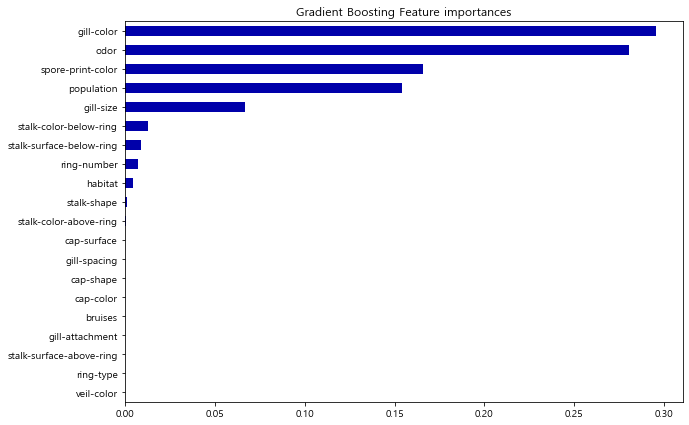

In [283]:
# Gradient Boosting feature importance 
importances_gb = pd.Series(gbrt.feature_importances_, index = columns)

#Sorting importances
sorted_importances_gb = importances_gb.sort_values()

#Plotting sorted importances
fig, ax = plt.subplots(figsize = (10,7))
sorted_importances_gb.plot(kind = 'barh')
ax.set_title('Gradient Boosting Feature importances')
plt.show()

In [284]:
# 상위 3개의 데이터만 selection
X_gb =data[['odor','gill-color','spore-print-color']]

In [285]:
# 데이터의 70%를 훈련 데이터로 사용
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb,y,test_size = 0.3,random_state = 42)

In [364]:
# 상위 특성 중요도 Gradient Boosting
print(gbrt)
gbrt.fit(X_train_gb,y_train_gb)
print('train 점수 : {:.3f}'.format(gbrt.score(X_train_gb, y_train_gb)))
print('test 점수 : {:.3f}'.format(gbrt.score(X_test_gb, y_test_gb)))
print('\n')
    

pred_gb= gbrt.predict(X_test_gb)
score = accuracy_score(y_test_gb,pred_gb)    
print(classification_report(y_test_gb,pred_gb))
print("accuracy_score:{:.3f}\n".format(score))

confusion(y_test_gb,pred_gb)

GradientBoostingClassifier()
train 점수 : 0.995
test 점수 : 0.993


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1257
           1       1.00      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

accuracy_score:0.993

오차 행렬 : 
[[1257    0]
 [  16 1165]]


In [300]:
# GridSearch를 이용하여 최적의 매개변수 찾기
param_gb=[{'n_estimators':range(5,50,10),
          'max_depth':range(1,5),
         'max_features':range(1,5),
         'learning_rate':np.linspace(0.1,1,10)}]

grid_gb=GridSearchCV(gbrt,param_grid=param_gb,cv=5)
grid_gb.fit(X_train_gb,y_train_gb)

print(grid_gb.best_score_)
print(grid_gb.best_estimator_)

model_gb=grid_gb.best_estimator_

0.9950755309891136
GradientBoostingClassifier(learning_rate=0.2, max_features=3, n_estimators=45)


In [365]:
# GridSearch를 적용한 결과, 이전과 동일
print(gbrt)
pred_gb= model_gb.predict(X_test_gb)
score = accuracy_score(y_test_gb,pred_gb)    
print(classification_report(y_test_gb,pred_gb))
print("accuracy_score:{:.3f}\n".format(score))
confusion(y_test_gb,pred_gb)

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1257
           1       1.00      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

accuracy_score:0.993

오차 행렬 : 
[[1257    0]
 [  16 1165]]


In [355]:
# LogisticRegression + PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # 위 모델들과 같게 3으로 설정
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("X_test_pca.shape: {}".format(X_test_pca.shape))

X_train_pca.shape: (5686, 3)
X_test_pca.shape: (2438, 3)


In [366]:
from sklearn.model_selection import cross_val_score
print(lr)
lr.fit(X_train_pca,y_train)
print('train 점수 : {:.3f}'.format(lr.score(X_train_pca, y_train)))
print('test 점수 : {:.3f}'.format(lr.score(X_test_pca, y_test)))
print('\n')
    
y_pred = lr.predict(X_test_pca)
score = accuracy_score(y_test,y_pred)    
print(classification_report(y_test,y_pred))
print("accuracy_score:{:.3f}\n".format(score))
confusion(y_test,y_pred)

LogisticRegression()
train 점수 : 0.817
test 점수 : 0.813


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1257
           1       0.81      0.80      0.80      1181

    accuracy                           0.81      2438
   macro avg       0.81      0.81      0.81      2438
weighted avg       0.81      0.81      0.81      2438

accuracy_score:0.813

오차 행렬 : 
[[1043  214]
 [ 242  939]]
